In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor 
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor

from sklearn import tree

In [2]:
df=pd.read_csv("adidas.csv")
df.head()
    

,Unnamed: 0,Retailer,Retailer ID,Invoice Date,Region,State,City,Product,Price per Unit,Units Sold,Total Sales,Operating Profit,Operating Margin,Sales Method
0,0,Foot Locker,1185732,2020-01-01 00:00:00,Northeast,New York,New York,Men's Street Footwear,50.0,1200,600000.0,300000.0,0.50,In-store
1,1,Foot Locker,1185732,2020-01-02 00:00:00,Northeast,New York,New York,Men's Athletic Footwear,50.0,1000,500000.0,150000.0,0.30,In-store
2,2,Foot Locker,1185732,2020-01-03 00:00:00,Northeast,New York,New York,Women's Street Footwear,40.0,1000,400000.0,140000.0,0.35,In-store
3,3,Foot Locker,1185732,2020-01-04 00:00:00,Northeast,New York,New York,Women's Athletic Footwear,45.0,850,382500.0,133875.0,0.35,In-store
4,4,Foot Locker,1185732,2020-01-05 00:00:00,Northeast,New York,New York,Men's Apparel,60.0,900,540000.0,162000.0,0.30,In-store


In [3]:
df = df.drop('Unnamed: 0',axis=1)
df.head()

,Retailer,Retailer ID,Invoice Date,Region,State,City,Product,Price per Unit,Units Sold,Total Sales,Operating Profit,Operating Margin,Sales Method
0,Foot Locker,1185732,2020-01-01 00:00:00,Northeast,New York,New York,Men's Street Footwear,50.0,1200,600000.0,300000.0,0.50,In-store
1,Foot Locker,1185732,2020-01-02 00:00:00,Northeast,New York,New York,Men's Athletic Footwear,50.0,1000,500000.0,150000.0,0.30,In-store
2,Foot Locker,1185732,2020-01-03 00:00:00,Northeast,New York,New York,Women's Street Footwear,40.0,1000,400000.0,140000.0,0.35,In-store
3,Foot Locker,1185732,2020-01-04 00:00:00,Northeast,New York,New York,Women's Athletic Footwear,45.0,850,382500.0,133875.0,0.35,In-store
4,Foot Locker,1185732,2020-01-05 00:00:00,Northeast,New York,New York,Men's Apparel,60.0,900,540000.0,162000.0,0.30,In-store


# EDA

In [4]:
#shape of dataset
df.shape

(9648, 13)

In [5]:
# count NAN in dataset
df.isna().sum()

Retailer            0
Retailer ID         0
Invoice Date        0
Region              0
State               0
City                0
Product             0
Price per Unit      0
Units Sold          0
Total Sales         0
Operating Profit    0
Operating Margin    0
Sales Method        0
dtype: int64

In [6]:
df.describe() #summary of data

,Retailer ID,Price per Unit,Units Sold,Total Sales,Operating Profit,Operating Margin
count,9.648000e+03,9648.000000,9648.000000,9648.000000,9648.000000,9648.000000
mean,1.173850e+06,45.216625,256.930037,93273.437500,34425.244761,0.422991
std,2.636038e+04,14.705397,214.252030,141916.016727,54193.113713,0.097197
min,1.128299e+06,7.000000,0.000000,0.000000,0.000000,0.100000
25%,1.185732e+06,35.000000,106.000000,4254.500000,1921.752500,0.350000
50%,1.185732e+06,45.000000,176.000000,9576.000000,4371.420000,0.410000
75%,1.185732e+06,55.000000,350.000000,150000.000000,52062.500000,0.490000
max,1.197831e+06,110.000000,1275.000000,825000.000000,390000.000000,0.800000


# TOP retailers 

In [7]:
#retailers
df['Retailer'].value_counts()

Foot Locker      2637
West Gear        2374
Sports Direct    2032
Kohl's           1030
Amazon            949
Walmart           626
Name: Retailer, dtype: int64

In [24]:
top_retailors = df.groupby('Retailer')['Operating Profit'].sum().sort_values(ascending=False).reset_index()
top_retailors

,Retailer,Operating Profit
1,West Gear,85667873.18
2,Foot Locker,80722124.81
3,Sports Direct,74332954.96
4,Kohl's,36811252.58
5,Amazon,28818503.31
6,Walmart,25782052.61


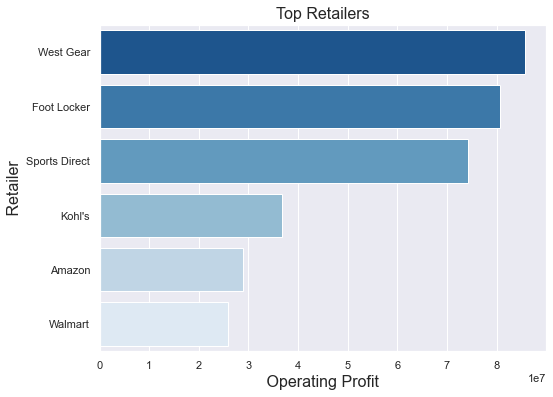

In [26]:
fig , ax = plt.subplots(figsize=(8,6))
sns.set(style='darkgrid')
sns.barplot(data=top_retailors, x='Operating Profit', y='Retailer', palette='Blues_r')
ax.set_xlabel(' Operating Profit ', fontsize = 16)
ax.set_ylabel(' Retailer ', fontsize = 16)
ax.set_title('Top Retailers', fontsize = 16)
plt.show()

In [15]:
df['Sales Method'].value_counts()

Online      4889
Outlet      3019
In-store    1740
Name: Sales Method, dtype: int64

    # Top selling product

In [17]:
top_selling_products = df.groupby('Product')['Total Sales'].sum().reset_index() #group by products and apply sum function on Total Sales Column
# top_selling_products.index+=1 # the index starts from 0 by default so we plus 1 in index here
top_selling_products

,Product,Total Sales
0,Men's Apparel,123728632.0
1,Men's Athletic Footwear,153673680.0
2,Men's Street Footwear,208826244.0
3,Women's Apparel,179038860.0
4,Women's Athletic Footwear,106631896.0
5,Women's Street Footwear,128002813.0


Text(0.5, 1.0, 'Top Selling Products')

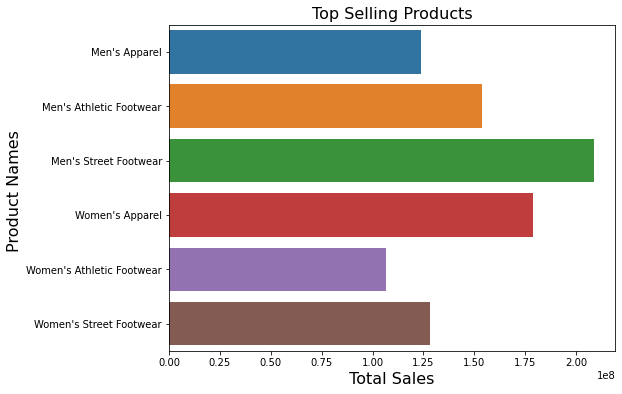

In [23]:
fig , ax = plt.subplots(figsize=(8,6))

sns.barplot(data = top_selling_products,y= 'Product',x ='Total Sales')
ax.set_xlabel(' Total Sales ', fontsize = 16)
ax.set_ylabel('Product Names ', fontsize = 16)
ax.set_title('Top Selling Products', fontsize = 16)

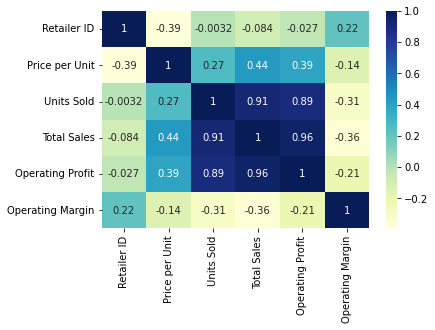

In [8]:
# Let's see the correlation between different variables.
sns.heatmap(df.corr(), cmap="YlGnBu", annot = True)
plt.show()
#Correlation Between different Variables using Heatmap

# Machine learning Part

In [9]:
#Train Test Model
X = df[['Units Sold','Operating Profit','Operating Margin','Price per Unit']] #features
y = df['Total Sales'] # target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [10]:
model = LinearRegression()
model.fit(X_train, y_train)
y_predicted = model.predict(X_test)
y_predicted

array([-32452.3596316 ,  10921.45334933,  29527.67958081, ...,
        40626.5680679 ,  37287.21889737, -12338.36690407])

In [11]:
model.score(X_test,y_test)

0.957043926267903

In [13]:
model = RandomForestRegressor (n_estimators = 5)
model.fit(X_train, y_train)
y_predicted = model.predict(X_test)

In [14]:
#score
model.score(X_test,y_test)

0.9990202927908747